# [Lecture 8] Classification

## 1. Classification problems:

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Simulate 2-classes, 2-features classification data randomly.


In [49]:
from sklearn import datasets
from pandas import Series, DataFrame
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X,y = make_classification(n_samples = 200, n_features = 2, n_classes = 2, 
                          n_informative = 2, n_redundant = 0, n_repeated = 0,
                          n_clusters_per_class = 2)
Data = DataFrame(X)
Data['class'] = y
Data.describe()

,0,1,class
count,200.000000,200.000000,200.00000
mean,0.096243,0.001991,0.50500
std,1.436239,1.220837,0.50123
min,-2.732999,-2.193045,0.00000
25%,-0.985000,-0.980251,0.00000
50%,-0.299032,-0.243891,1.00000
75%,1.085606,1.045886,1.00000
max,5.149535,3.666199,1.00000


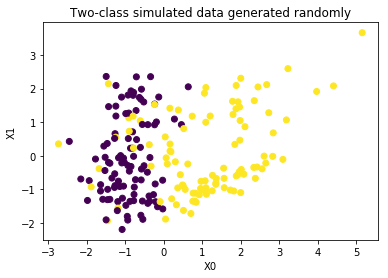

In [50]:
d = plt.scatter(X[:,0],X[:,1],marker = 'o',c = y)
d = plt.xlabel("X0")
d = plt.ylabel("X1")
d = plt.title("Two-class simulated data generated randomly")
plt.show()

### Multi-class classification examples: iris dataset

In [51]:
iris = datasets.load_iris()
irisX = iris['data']
irisy = iris.target

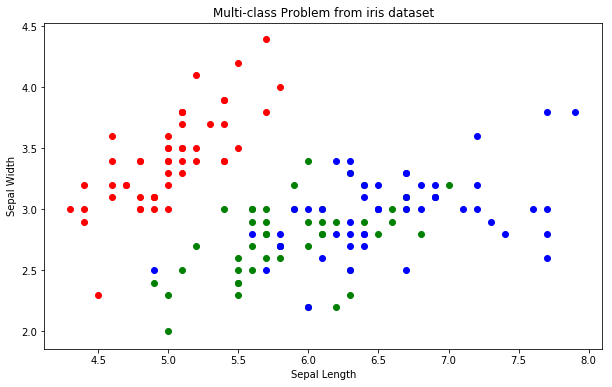

In [52]:
cols = ['red','green','blue']
fig, dummy = plt.subplots()
fig.set_size_inches(10,6)
for idx,label in enumerate(iris['target_names']):
    d = plt.scatter(x = irisX[iris['target']==idx,0],
                y = irisX[iris['target']==idx,1],
                marker = 'o',
                c = cols[idx])
d = plt.xlabel("Sepal Length")
d = plt.ylabel("Sepal Width")
d = plt.title("Multi-class Problem from iris dataset")
d = plt.show()

### Or simply:

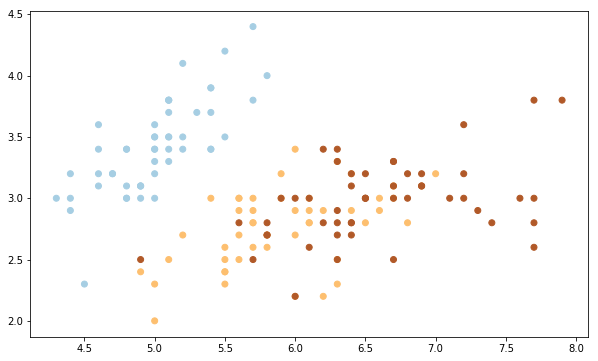

In [53]:
fig,dummy = plt.subplots()
fig.set_size_inches(10,6)
d = plt.scatter(x = irisX[:,0],y = irisX[:,1],c = iris.target, cmap = plt.cm.Paired)
plt.show()

## 2. Logistic regression:

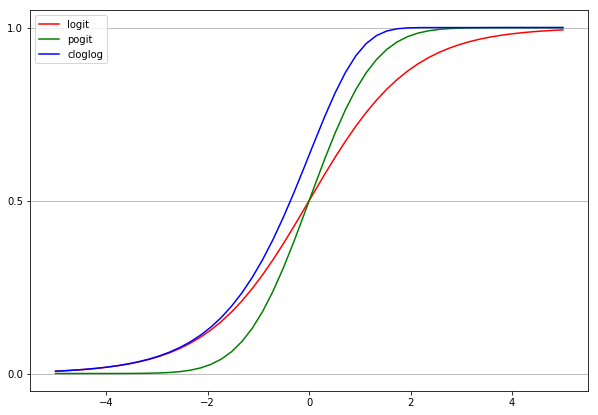

In [54]:
from numpy import linspace
from scipy.stats import norm
def logit(x):
    return 1/(1+np.exp(-x))

def pogit(x):
    return norm.cdf(x)

def cloglog(x):
    return 1-np.exp(-np.exp(x))

#Draw the three logistic function:
x = linspace(-5,5,50)
fig = plt.gcf()
fig.set_size_inches(10, 7)
dummy = plt.plot(x,logit(x),c = 'red', label = 'logit')
dummy = plt.plot(x,pogit(x),c = 'green', label = 'pogit')
dummy = plt.plot(x,cloglog(x),c = 'blue', label = 'cloglog')
dummy = plt.legend(loc = 'best')
dummy = plt.yticks([0,0.5,1])

ax = plt.gca()
dummy = ax.yaxis.grid(True)
plt.show()


### In python, sklearn.logisticRegression function can easily fit the binomial model using the logit function

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
testSize = 0.2
X,y = make_classification(n_samples = 200, n_features = 2, n_classes = 2, 
                          n_informative = 1, n_redundant = 0, n_repeated = 0,
                          n_clusters_per_class = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = testSize,random_state = 0)

fit_lgs = LogisticRegression()
fit_lgs.fit(X_train,y_train)
print("This is the fitted parameters for logistic regression: ",fit_lgs.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

This is the fitted parameters for logistic regression:  [[ 2.16300071  0.26230539]]


# 2.1 Decision boundary:

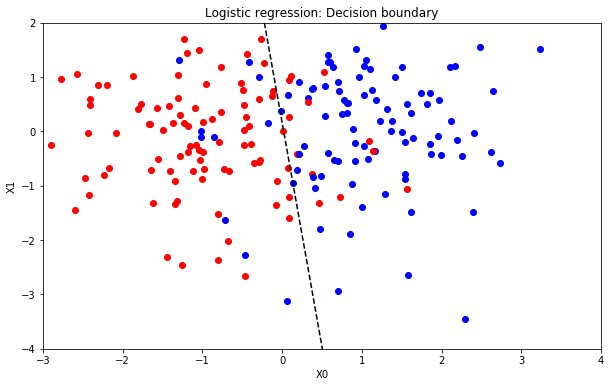

In [56]:
cols = ['red','blue']
fig, dummy = plt.subplots()
fig.set_size_inches(10,6)
xlim = plt.xlim([-3,4])
ylim = plt.ylim([-4,2])
for idx,label in enumerate(y) :
    dummy =  plt.scatter(x = X[idx,0], y = X[idx,1],
                marker = 'o',
                c = cols[label])
dummy = plt.xlabel("X0")
dummy = plt.ylabel("X1")
dummy = plt.title("Logistic regression: Decision boundary")

coef = fit_lgs.coef_[0]
intercept = fit_lgs.intercept_[0]
abValues = [-intercept/coef[1] - (coef[0]/coef[1])*x for x in linspace(-3,4,100)]
dummy =plt.plot(linspace(-3,4,100),abValues, linestyle = '--',color = 'black')


plt.show()

In [67]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from matplotlib.colors import ListedColormap
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))

#This function is used to draw colorful decision regions according to different classifiers
#and data.
def plot_decision_regions(X, y, classifier, test_idx=None, 
                          resolution=0.02, xlabel='', ylabel='', title=''):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig = plt.gcf()
    fig.set_size_inches(10,7)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

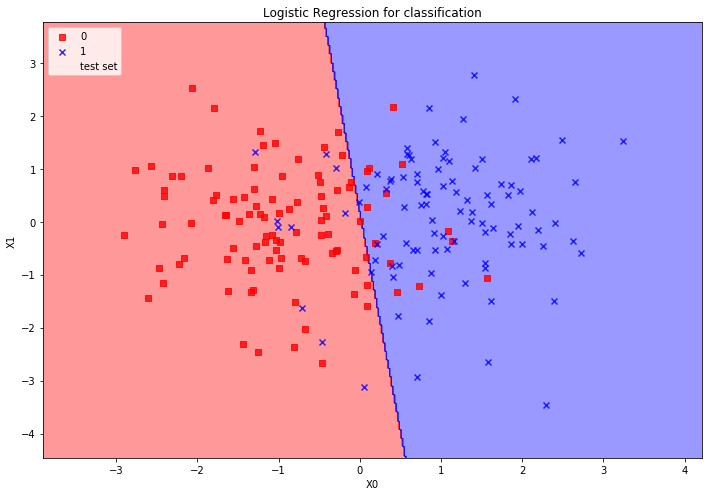

In [68]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])

plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = fit_lgs,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='Logistic Regression for classification')

## Softmax Regression for multi-calss classification:

In python, softmax regression is implemented in same method in sklearn.LogisticRegression. Besides, it automatically use softmax if the number of classes is greater than 2.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

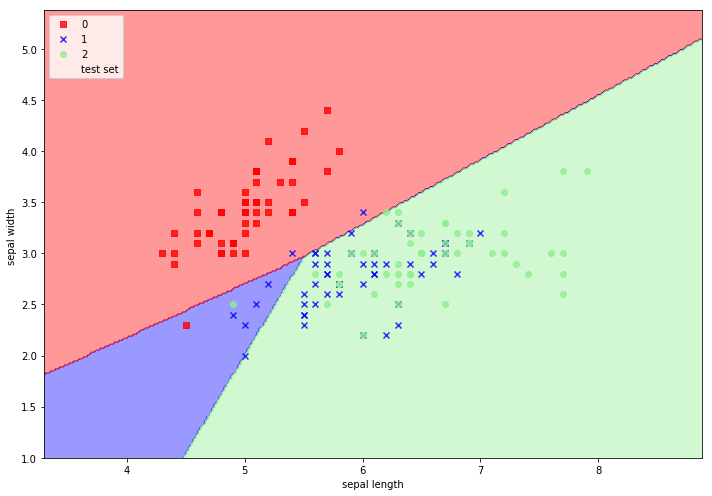

In [69]:
testSize = 0.2
irisX_train,irisX_test,irisy_train,irisy_test =\
train_test_split(irisX[:,[0,1]],irisy,test_size = testSize,random_state = 0)

lr = LogisticRegression()
lr.fit(irisX_train, irisy_train)


irisX_combined = np.vstack((irisX_train, irisX_test))
irisy_combined = np.hstack((irisy_train, irisy_test))

iristest_idx = range(irisX_train.shape[0], irisX_combined.shape[0])
#print(irisy_combined)
plot_decision_regions(X = irisX_combined, y = irisy_combined,
                      classifier = lr, 
                      test_idx = iristest_idx,
                      xlabel='sepal length', 
                      ylabel='sepal width ')

## 4. Two Other Method:
### 4.1 Discriminant Anaysis

In python, we use sklearn.discriminant_analysis package to do LDA and QDA classification:

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

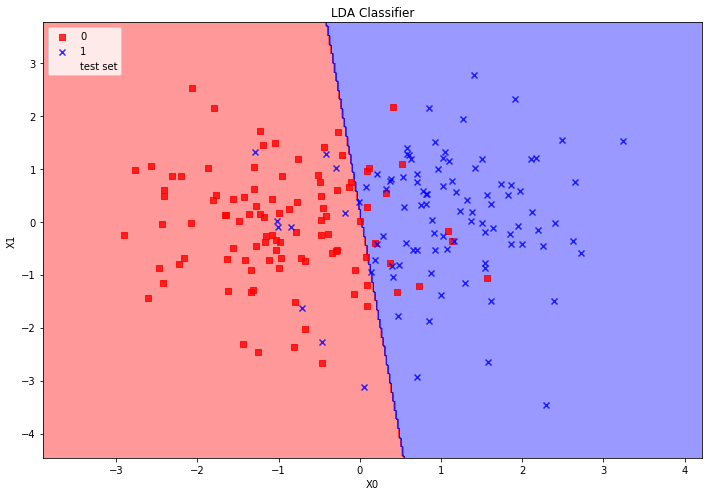

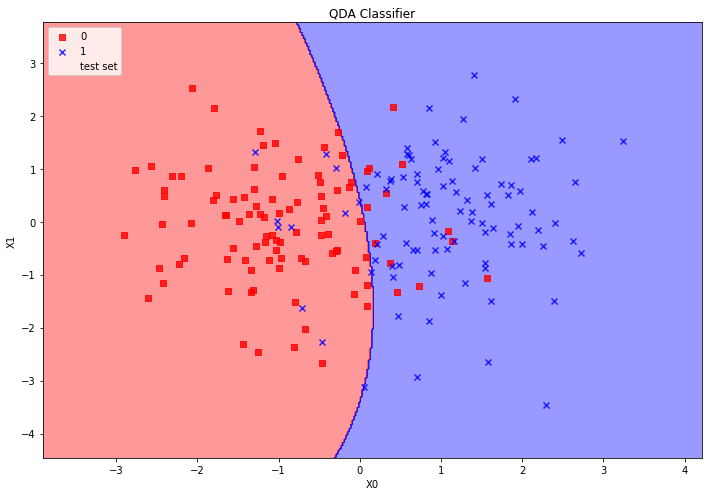

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
lda = LDA()
lda.fit(X_train, y_train)

qda = QDA()
qda.fit(X_train,y_train)

#plt.subplot(1,2,1)
plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = lda,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='LDA Classifier')
#plt.subplot(1,2,2)
plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = qda,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='QDA Classifier')

### Classification on iris dataset:

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

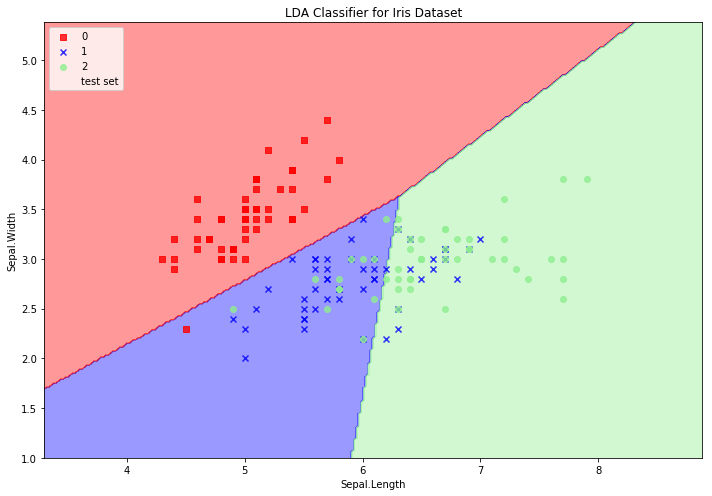

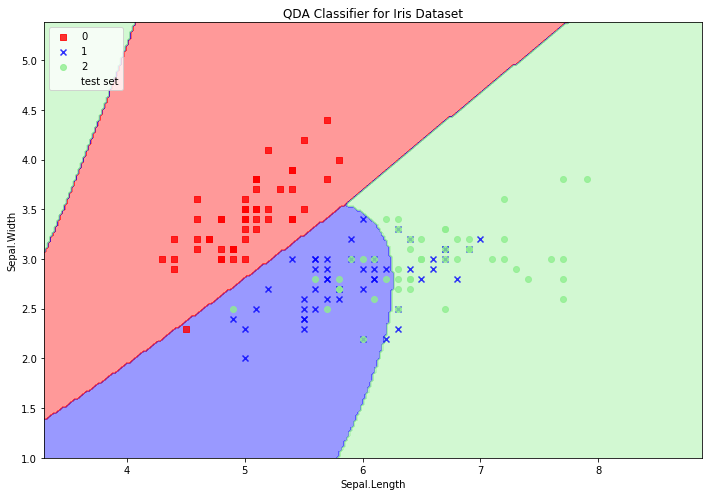

In [71]:
iris_lda = LDA()
iris_lda.fit(irisX_train,irisy_train)

iris_qda = QDA()
iris_qda.fit(irisX_train, irisy_train)

plot_decision_regions(X=irisX_combined,y=irisy_combined,
                      classifier = iris_lda,test_idx=iristest_idx,
                      xlabel='Sepal.Length', ylabel='Sepal.Width', title='LDA Classifier for Iris Dataset')

plot_decision_regions(X=irisX_combined,y=irisy_combined,
                      classifier = iris_qda,test_idx=iristest_idx,
                      xlabel='Sepal.Length', ylabel='Sepal.Width', title='QDA Classifier for Iris Dataset')